<a href="https://colab.research.google.com/github/sipocz/pid_time_series/blob/main/Pid_time_Series_DataPipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import json
import pandas

In [5]:
url="https://github.com/sipocz/pid_time_series/raw/2e7d263d051c58e9ba9f879472a02ed6fe0d79f5/HW_PID.csv"


In [6]:
fname=url.split("/")[-1]

In [7]:
!rm $fname*

rm: cannot remove 'HW_PID.csv*': No such file or directory


In [40]:
!wget $url

--2022-07-11 12:04:53--  https://github.com/sipocz/pid_time_series/raw/2e7d263d051c58e9ba9f879472a02ed6fe0d79f5/HW_PID.csv
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/sipocz/pid_time_series/2e7d263d051c58e9ba9f879472a02ed6fe0d79f5/HW_PID.csv [following]
--2022-07-11 12:04:53--  https://raw.githubusercontent.com/sipocz/pid_time_series/2e7d263d051c58e9ba9f879472a02ed6fe0d79f5/HW_PID.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4260 (4.2K) [text/plain]
Saving to: ‘HW_PID.csv.1’

HW_PID.csv.1        100%[===================>]   4.16K  --.-KB/s    in 0s      

2022-07-11 12:04:53 (34.9 MB/

In [9]:
def get_controller_name(fname):
    f=open(fname)
    o=f.readlines()
    f.close()
    py_json=json.loads(o[0])
    out=py_json[0]["itemID"].split(".")[0]
    return(out)


In [10]:

__DEBUG__=True
def extract_values(fname,cname,to_csv=False):
    oo=[]
    pid_tag=get_controller_name(fname)
    f=open(fname)
    o=f.readlines()
    f.close()
    for py_json_str in o:
        py_json=json.loads(py_json_str)
        for rec in py_json:
            if rec["itemID"]==pid_tag+cname:
                if __DEBUG__:    
                    print(f'{rec["timestamp"]},{rec["value"]}')
                oo.append([rec["timestamp"],rec["value"]])
    if to_csv:
        df=pandas.DataFrame(oo,columns=["timestamp","values"])
        pandas.to_datetime(df['timestamp'], format="%Y-%m-%dT%H:%M:%S.%fZ")
        pid_tag_fname=pid_tag+cname+".csv"
        df.to_csv(pid_tag_fname,index=False)
        return(df)
    return()    

In [11]:
df=extract_values(fname,".PV",to_csv=True)

2022-06-23T09:34:57.601Z,-30.749155044555664
2022-06-23T09:35:02.601Z,-30.477317810058594
2022-06-23T09:35:07.601Z,-30.92232894897461
2022-06-23T09:35:12.601Z,-30.669662475585938
2022-06-23T09:35:17.601Z,-29.92696189880371
2022-06-23T09:35:22.601Z,-30.067441940307617
2022-06-23T09:35:27.601Z,-30.059770584106445
2022-06-23T09:35:32.601Z,-29.704492568969727
2022-06-23T09:35:37.601Z,-29.341022491455078


In [12]:
df.head()

,timestamp,values
0,2022-06-23T09:34:57.601Z,-30.749155
1,2022-06-23T09:35:02.601Z,-30.477318
2,2022-06-23T09:35:07.601Z,-30.922329
3,2022-06-23T09:35:12.601Z,-30.669662
4,2022-06-23T09:35:17.601Z,-29.926962


In [19]:
from google.colab import drive
drive.mount('/gdrive',force_remount=True)

Mounted at /gdrive


In [38]:
fname="/gdrive/MyDrive/2022Anna/Data/Honeywell/2T3_3L1_DPH7_0711.csv"

In [43]:
df=extract_values(fname,".MD",to_csv=True)

A streamkimeneten csak az utolsó 5000 sor látható.
2022-07-10T15:21:06.401Z,2
2022-07-10T15:21:16.401Z,2
2022-07-10T15:21:26.401Z,2
2022-07-10T15:21:36.401Z,2
2022-07-10T15:21:46.401Z,2
2022-07-10T15:21:56.401Z,2
2022-07-10T15:22:06.401Z,2
2022-07-10T15:22:16.401Z,2
2022-07-10T15:22:26.401Z,2
2022-07-10T15:22:36.401Z,2
2022-07-10T15:22:46.401Z,2
2022-07-10T15:22:56.401Z,2
2022-07-10T15:23:06.401Z,2
2022-07-10T15:23:16.401Z,2
2022-07-10T15:23:26.401Z,2
2022-07-10T15:23:36.401Z,2
2022-07-10T15:23:46.401Z,2
2022-07-10T15:23:56.401Z,2
2022-07-10T15:24:06.401Z,2
2022-07-10T15:24:16.401Z,2
2022-07-10T15:24:26.401Z,2
2022-07-10T15:24:36.401Z,2
2022-07-10T15:24:46.401Z,2
2022-07-10T15:24:56.401Z,2
2022-07-10T15:25:06.401Z,2
2022-07-10T15:25:16.401Z,2
2022-07-10T15:25:26.401Z,2
2022-07-10T15:25:36.401Z,2
2022-07-10T15:25:46.401Z,2
2022-07-10T15:25:56.401Z,2
2022-07-10T15:26:06.401Z,2
2022-07-10T15:26:16.401Z,2
2022-07-10T15:26:26.401Z,2
2022-07-10T15:26:36.401Z,2
2022-07-10T15:26:46.401Z,2
2022

In [44]:
!pwd

/content


In [45]:
cp 2T3*.csv /gdrive/MyDrive/2022Anna/Datapipeline/1

In [55]:
# Itt kezdődhet a feldolgozás

In [56]:
from google.colab import drive
drive.mount('/gdrive',force_remount=True)

Mounted at /gdrive


In [57]:
hw_df=pandas.read_csv("/gdrive/MyDrive/2022Anna/Datapipeline/1/2T3_3L1_DPH7.PV.csv")

In [60]:
print(hw_df.head())
print (hw_df.dtypes)


                  timestamp     values
0  2022-06-23T11:05:32.601Z  26.640650
1  2022-06-23T11:05:37.601Z  26.017090
2  2022-06-23T11:05:42.601Z  25.229441
3  2022-06-23T11:05:47.601Z  29.034834
4  2022-06-23T11:05:52.601Z  31.520826
timestamp     object
values       float64
dtype: object


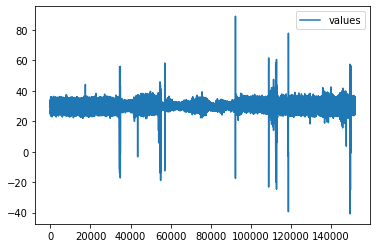

In [59]:
hw_df.plot()